In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# read daily data
processed_dfs = []
for filename in sorted(os.listdir('data/aggregated_individual_data/')):
    with open('data/aggregated_individual_data/'+filename, 'r') as f: # open in readonly mode
        df = pd.read_csv(f)
        processed_dfs.append(df)

In [3]:
# read data per measurement
processed_dfs_measure = []
for filename in sorted(os.listdir('data/aggregated_individual_data_per_measurement/')):
    with open('data/aggregated_individual_data_per_measurement/'+filename, 'r') as f: # open in readonly mode
        df = pd.read_csv(f)
        processed_dfs_measure.append(df)

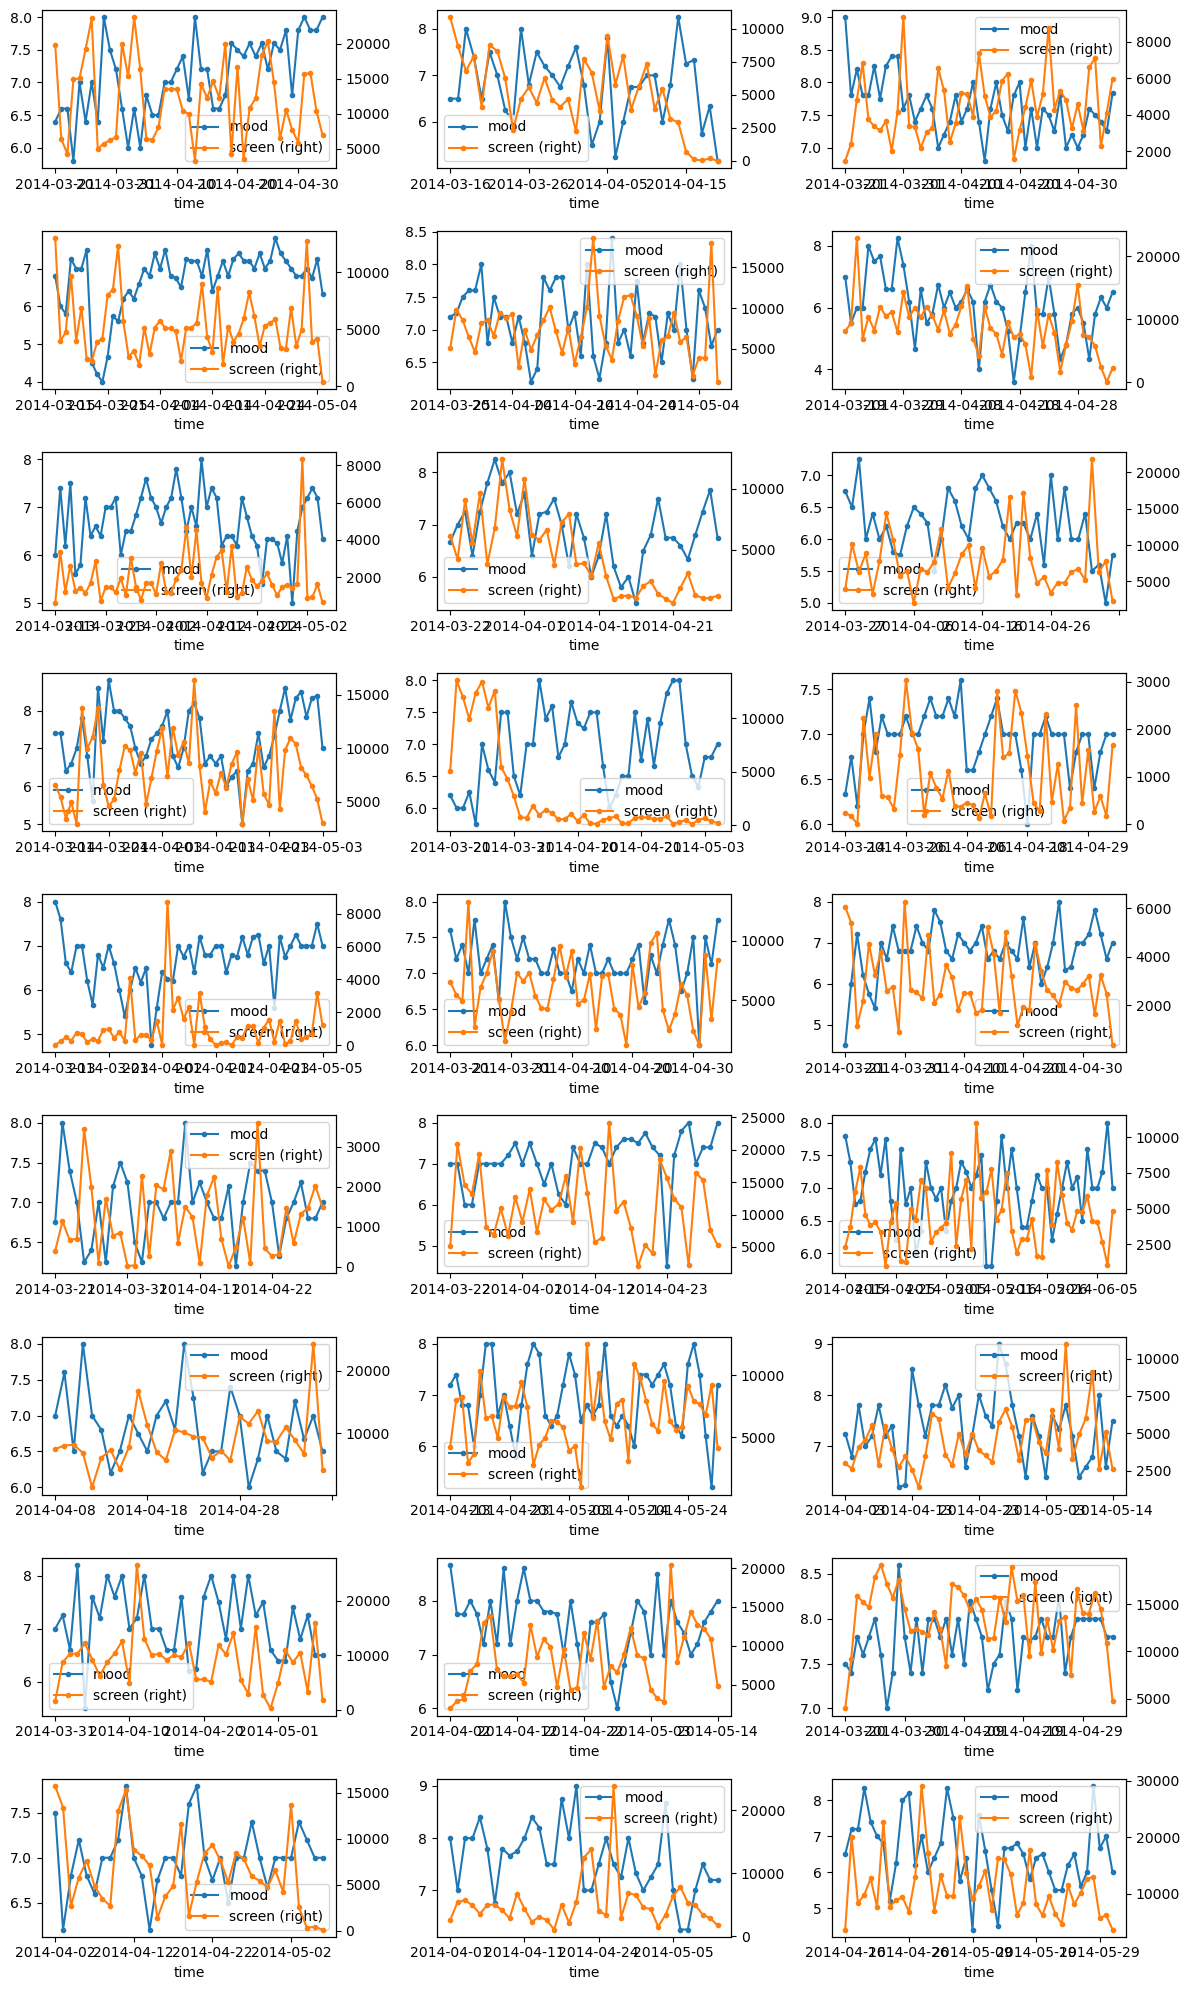

In [5]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot('time', 'mood', ax = axes[row, col], marker = '.')
        processed_dfs[counter].plot('time', 'screen', ax = axes[row, col], secondary_y=True, marker = '.')
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

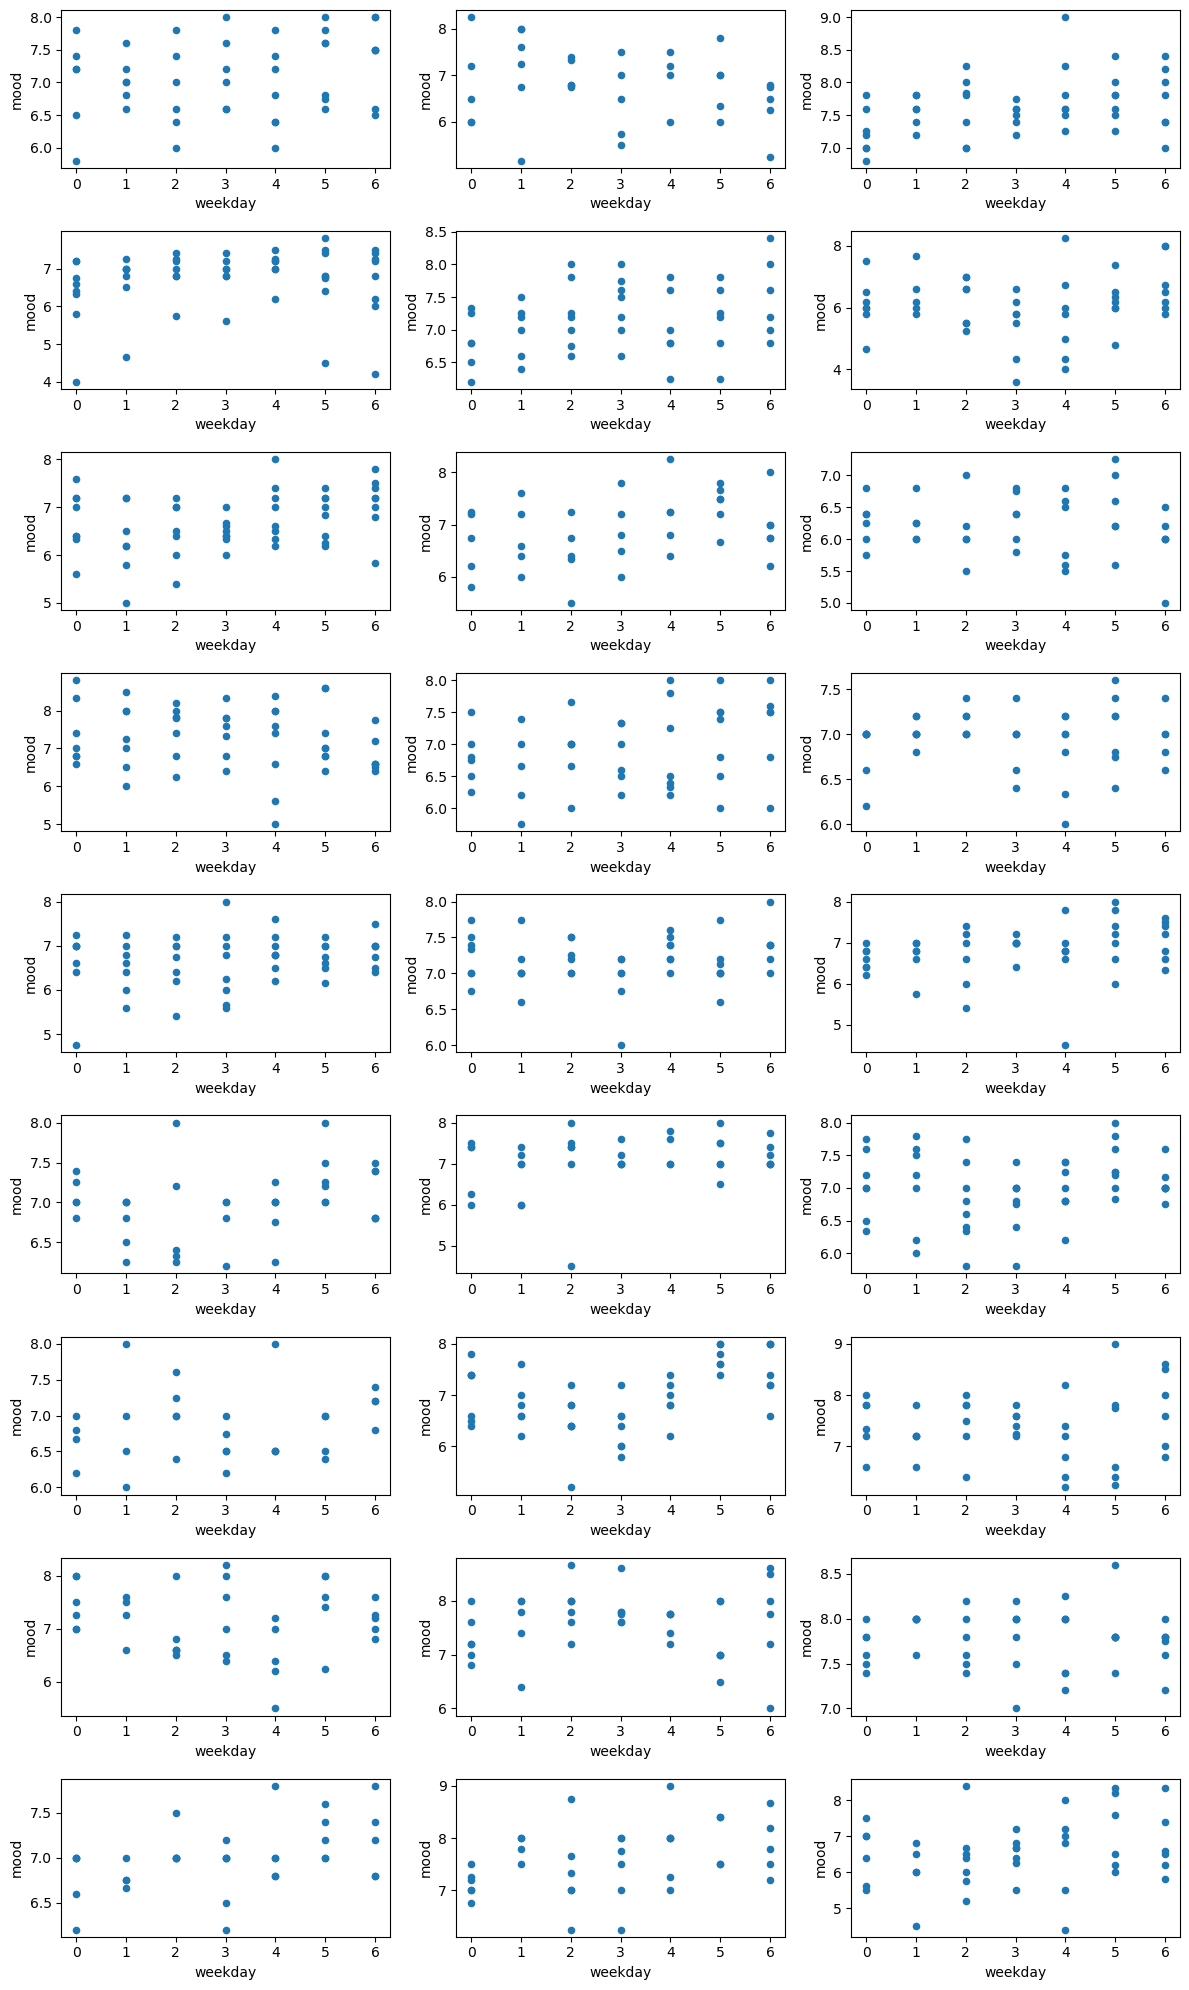

In [6]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot.scatter('weekday', 'mood', ax = axes[row, col])
        #processed_dfs[counter].plot('date', 'screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

In [15]:
mood_weekday = np.empty([len(processed_dfs), 7])

for i, df in enumerate(processed_dfs):
    for j in range(7):
        mood_weekday[i, j] = df['mood'].loc[df['weekday'] == j].mean()

mood_weekday_all = np.mean(mood_weekday, axis = 0)
mood_weekday_all_std = np.std(mood_weekday, axis = 0)

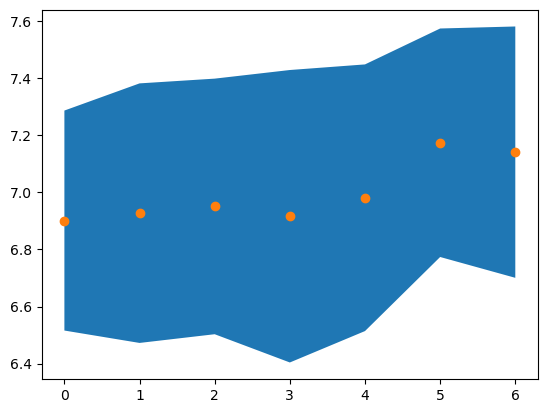

In [17]:
plt.fill_between(np.arange(0,7,1), mood_weekday_all-mood_weekday_all_std, mood_weekday_all+mood_weekday_all_std)
plt.scatter(np.arange(0,7,1),mood_weekday_all)

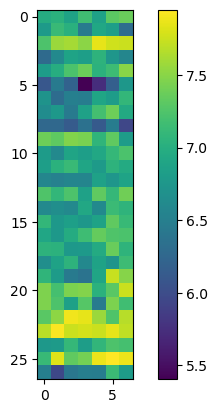

In [12]:
plt.imshow(mood_weekday)
plt.colorbar()

In [ ]:
window = 10
for df in processed_dfs_measure:
    df['SMA_mood'] = df['mood'].rolling(window).mean()
    df['SMA_screen'] = df['screen'].rolling(window).mean()
    df['EWM_mood'] = df['mood'].ewm(span=window).mean()
    df['EWM_screen'] = df['screen'].ewm(span=window).mean()

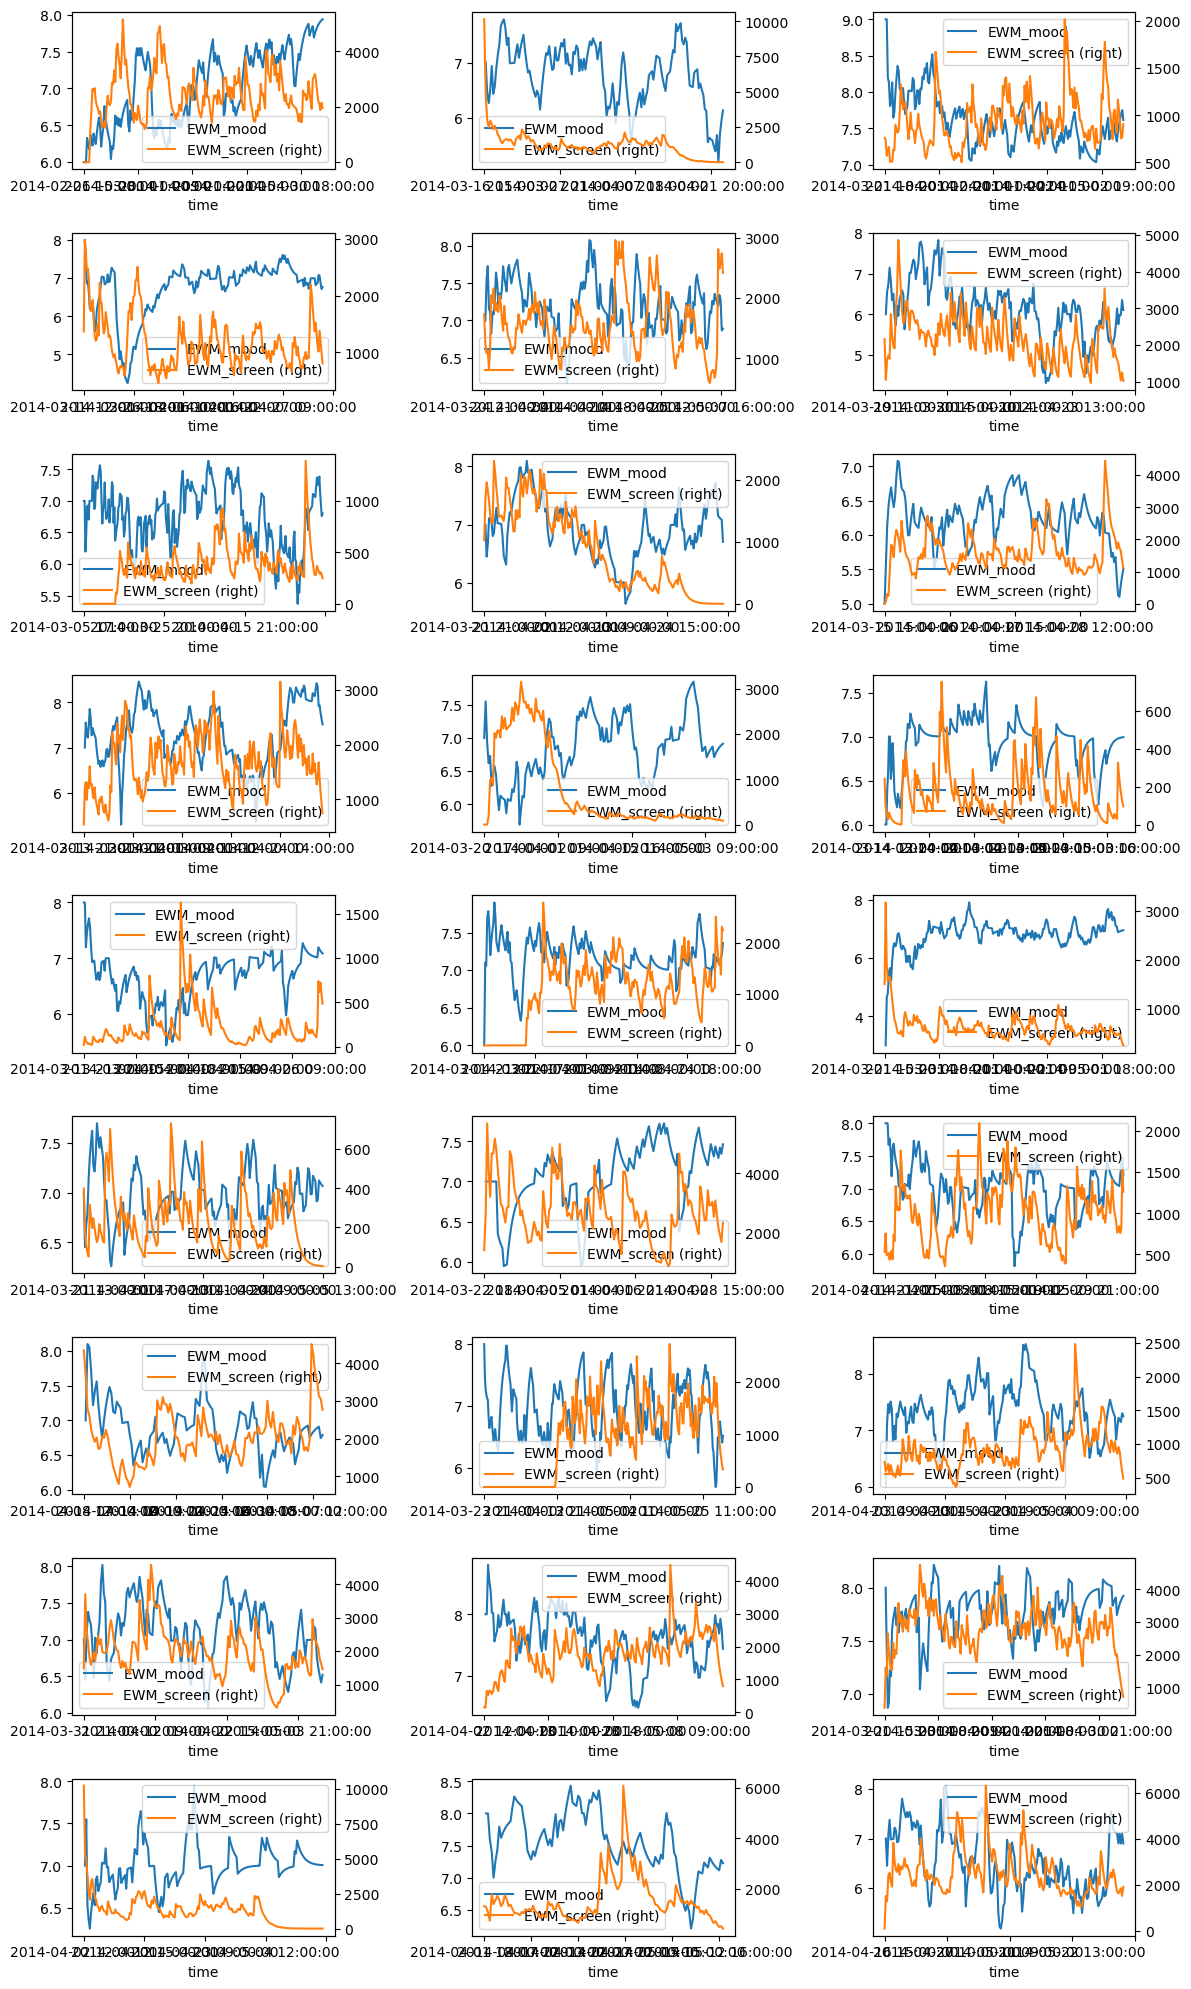

In [ ]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        # processed_dfs_measure[counter].plot('time', 'SMA_mood', ax = axes[row, col])
        # processed_dfs_measure[counter].plot('time', 'SMA_screen', ax = axes[row, col], secondary_y=True)
        processed_dfs_measure[counter].plot('time', 'EWM_mood', ax = axes[row, col])
        processed_dfs_measure[counter].plot('time', 'EWM_screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

In [ ]:
processed_dfs[0]

,Unnamed: 0,time,weekday,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,date
0,0,NaN,<built-in method weekday of datetime.date obje...,6.40,0.200000,0.400000,0.240971,19884.469000,39.0,10.0,...,18.196,0.000,62.281,240.060,5316.231,915.445,45.173,619.828,0,2014-03-21
1,1,NaN,<built-in method weekday of datetime.date obje...,6.60,0.600000,0.750000,0.227151,6376.119999,3.0,1.0,...,52.424,0.000,109.925,97.125,439.632,37.305,0.000,117.621,0,2014-03-22
2,2,NaN,<built-in method weekday of datetime.date obje...,6.60,0.200000,0.400000,0.114042,4258.870001,0.0,0.0,...,0.000,0.000,0.000,52.658,367.596,0.000,0.000,0.000,0,2014-03-23
3,3,NaN,<built-in method weekday of datetime.date obje...,5.80,1.000000,0.000000,0.197505,14915.900001,10.0,0.0,...,77.509,0.000,3.010,87.738,3691.595,419.805,0.000,208.818,0,2014-03-24
4,4,NaN,<built-in method weekday of datetime.date obje...,7.00,0.750000,0.750000,0.108581,15055.802999,0.0,1.0,...,43.054,0.000,0.000,140.656,1527.405,0.000,235.223,74.431,0,2014-03-25
5,5,NaN,<built-in method weekday of datetime.date obje...,6.40,-0.200000,0.400000,0.245389,19237.205000,0.0,0.0,...,20.175,0.000,0.000,133.651,3683.705,0.000,0.000,148.462,0,2014-03-26
6,6,NaN,<built-in method weekday of datetime.date obje...,7.00,0.200000,1.000000,0.326086,23618.290999,2.0,1.0,...,74.375,0.000,182.451,64.562,2301.075,47.314,0.000,197.306,0,2014-03-27
7,7,NaN,<built-in method weekday of datetime.date obje...,6.40,-0.600000,0.400000,0.083298,4974.484000,5.0,0.0,...,89.166,233.036,0.000,222.926,512.741,1133.009,0.000,316.805,0,2014-03-28
8,8,NaN,<built-in method weekday of datetime.date obje...,8.00,-0.200000,1.000000,0.148375,5732.092999,4.0,1.0,...,0.000,0.000,0.000,166.604,472.888,52.435,0.000,470.017,0,2014-03-29
9,9,NaN,<built-in method weekday of datetime.date obje...,7.50,0.000000,0.750000,0.102381,6203.853001,0.0,0.0,...,0.000,0.000,0.000,79.835,157.465,0.000,66.477,168.916,0,2014-03-30
